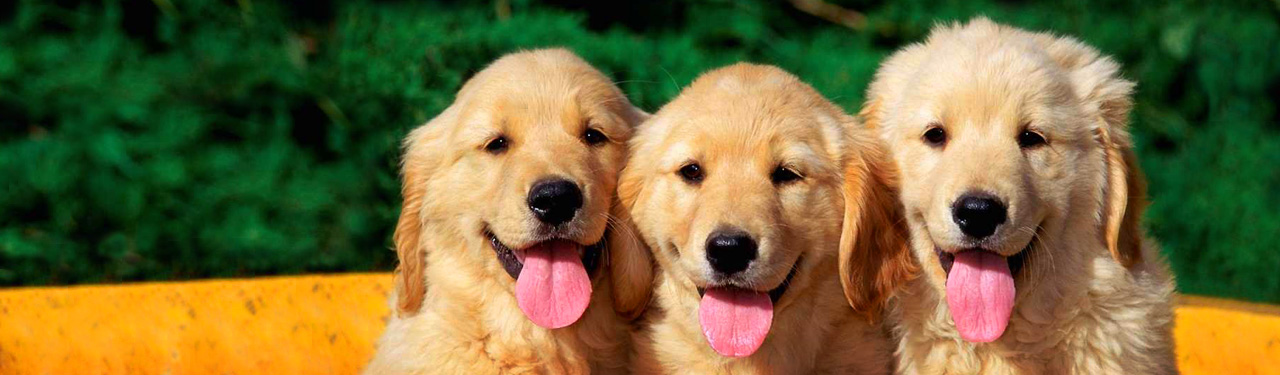

# Project: Wrangling and Analyze Data

## Table of Content
<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#gather'>Gather</a></li>
    <li><a href='#assess'>Assess</a></li>
    <li><a href='#asess_info'>Assess Summary</a></li>
    <li><a href='#clean'>Clean</a></li>
    <li><a href='#quality'>Quality Cleaning</a></li>
    <li><a href='#tidy'>Tidiness Cleaning</a></li>
    <li><a href='#analysis'>Analysis</a></li>
    <li><a href='#insight'>Insights</a></li>
    <li><a href='#viz'>Visualization</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that used for wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent."🐶💕 WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

#### The Data
This project will be working on the following three datasets.

- **Enhanced Twitter Archive**

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, it was filtered for tweets with ratings only (there are 2356).

- **Additional Data via the Twitter API**

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But because pf the availability of the WeRateDogs Twitter archive and specifically the tweet IDs within it,we can gather this data for all 5000+.

- **Image Predictions File**

One more cool thing: Every image in the WeRateDogs Twitter archive was ran through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

<a id='gather'></a>
## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import os

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [5]:
image_predictions = pd.read_csv("image_predictions/image-predictions.tsv", sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
tweet_list = []
with open('tweet_json.txt','r') as file:
    for line in file:
        data = json.loads(line)
        tweet_list.append(data)
tweets_data = pd.DataFrame(tweet_list, columns=['id','retweet_count','favorite_count'])

<a id='assess'></a>
## Assessing Data

#### `twitter_archive` table

In [7]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [8]:
twitter_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [9]:
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1969  673317986296586240                    NaN                  NaN   
1669  682429480204398592                    NaN                  NaN   
79    877556246731214848                    NaN                  NaN   
1431  697516214579523584                    NaN                  NaN   
1836  676098748976615425                    NaN                  NaN   

                      timestamp  \
1969  2015-12-06 01:48:12 +0000   
1669  2015-12-31 05:14:01 +0000   
79    2017-06-21 15:58:08 +0000   
1431  2016-02-10 20:23:19 +0000   
1836  2015-12-13 17:57:57 +0000   

                                                 source  \
1969  <a href="http://twitter.com/download/iphone" r...   
1669  <a href="http://twitter.com/download/iphone" r...   
79    <a href="http://twitter.com/download/iphone" r...   
1431  <a href="http://vine.co" rel="nofollow">Vine -...   
1836  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1969  Take a moment and appreciate how these two dog...                  NaN   
1669  I know we joke around on here, but this is get...                  NaN   
79    This is Penny. She's both pupset and fired pup...                  NaN   
1431  Say hello to Pherb. He does parkour. 9/10 http...                  NaN   
1836  Extremely rare pup here. Very religious. Alway...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1969                       NaN                        NaN   
1669                       NaN                        NaN   
79                         NaN                        NaN   
1431                       NaN                        NaN   
1836                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1969  https://twitter.com/dog_rates/status/673317986...                10   
1669  https://twitter.com/dog_rates/status/682429480...                 8   
79    https://twitter.com/dog_rates/status/877556246...                12   
1431                      https://vine.co/v/i1LriMBmX6W                 9   
1836  https://twitter.com/dog_rates/status/676098748...                 3   

      rating_denominator   name doggo floofer pupper puppo  
1969                  10   None  None    None   None  None  
1669                  10   None  None    None   None  None  
79                    10  Penny  None    None   None  None  
1431                  10  Pherb  None    None   None  None  
1836                  10   None  None    None   None  None

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [13]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
#renaming rating_numertor to rating(/10)
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
weird_denominator = twitter_archive[twitter_archive['rating_denominator'].isin([11,50,20,80,70,7,15,150,
                                                                                            170,0,90,40,130,110,16,120,2])]
weird_denominator

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

**The record with denominator:**
- *0* is not a rating. No rating available.
- *15* is not a rating. No raitng available.
- *70* correct. breed=floof
- *7* is not a rating. No raitng available.
- *11* duplicate.
- *150* correct
- *11* not a rating. Rating = 14/10. name = Bretagne.
- *170* Correct. breed=doggo
- *20* is not a rating. Rating = 14/10
- *50* not a rating. Rating = 11/10
- *90* correct. breed=pupper -> 11/10
- *80* correct. breed=pupper -> 10/10
- *50* correct. name=Cletus, Jerome, Alejandro, Burp,Titson
- *50* correct. breed=pupper
- *40* correct. breed=pupper
- *20* not a rating. Drop
- *130* correct.
- *110* correct. ->12/10 breed=puppers
- *11* is not a rating. Rating=10/10
- *16* not a rating. Drop
- *120* correct. breed=pupper
- *80* correct. breed=pupper. 11/10
- *2* not a rating. Rating = 9/10

______

#### `image_predictions` table

In [19]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [20]:
image_predictions.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [21]:
image_predictions.sample(5)

tweet_id                                          jpg_url  \
1865  843235543001513987  https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg   
400   673688752737402881  https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg   
551   677557565589463040  https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg   
1779  828409743546925057  https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg   
59    667119796878725120  https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg   

      img_num                           p1   p1_conf  p1_dog  \
1865        1                     Pembroke  0.958452    True   
400         1  soft-coated_wheaten_terrier  0.340806    True   
551         1                    seat_belt  0.277257   False   
1779        1                        teddy  0.908457   False   
59          1                     Pembroke  0.741563    True   

                    p2   p2_conf  p2_dog               p3   p3_conf  p3_dog  
1865          Cardigan  0.023770    True        Chihuahua  0.005269    True  
400   Sealyham_terrier  0.234898    True           kuvasz  0.203495    True  
551           Shih-Tzu  0.249017    True         Pekinese  0.209213    True  
1779        toy_poodle  0.018040    True  standard_poodle  0.012667    True  
59           Chihuahua  0.057866    True       toy_poodle  0.039125    True

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


______

#### `tweets_data` table

In [23]:
tweets_data

id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [24]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
tweet_list

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

<a id='assess_info'></a>
### Quality issues
1. `image_predictions` table: underscore separating predictions in p1, p2, p3

2. `image_predictions` table: some predictions values in p1,p2and p3 start with caps while others don't.

3. `image_predictions` table: The columns - *jpg_url,p1,p1_cof,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog* - are not descriptive enough
    
4. `twitter_achive` table: *source* column has link tags <a href="..." rel="...">...</a>

5. `twitter_achive` table: *timestamp* has extra +0000

6. `twitter_archive` table: *name* column has invalid names (a, not, one, mad, an, very, O, just, my, his, actually, this , unacceptable, all, old,infuriating, the, space) and misspelled Billl

7. `twitter_archive` table: missing data in *dog stage(doggo, pupper,puppo, floofer)* columns but recorded with *None* and *a*

8. `tweet_data` table: id column should be tweet_id

### Tidiness issues
1. `twitter_archive` table: drop columns(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
    in_reply_to_status_id, in_reply_to_user_id)
    
2. `twitter_archive` table:  Create new rating(/10) column and drop old rating columns
   
3. `twitter_archive` table: create dog stage(puppo,pupper,doggo,floofer)
4. `tweets_data` and `twitter_archive` need to be in the same table

_____

<a id='clean'></a>
## Cleaning Data

In [26]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
tweets_data_clean = tweets_data.copy()
image_predictions_clean = image_predictions.copy()

In [27]:
image_predictions_clean

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

<a id='quality'></a>
## Quality

### Issue #1:

#### Define:
In `image_predictions_clean` table, remove underscore separating predictions in p1, p2, p3 with replace function

#### Code

In [28]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_',' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_',' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_',' ')

#### Test

In [29]:
image_predictions_clean

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh springer spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature pinscher   
2           1         German shepherd  0.596461    True            malinois   
3           1     Rhodesian ridgeback  0.408143    True             redbone   
4           1      miniature pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English springer   
2071        1             paper towel  0.170278   False  Labrador retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland sheepdog  0.061428    True  
1     0.074192    True          Rhodesian ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German short-haired pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Issue #2:
#### Define: 
`image_predictions` table: Change predicted values in p1,p2 and p3 to lowercase using .lower() for uniformity.

#### Code: 

In [30]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

#### Test: 

In [31]:
image_predictions_clean

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  welsh springer spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature pinscher   
2           1         german shepherd  0.596461    True            malinois   
3           1     rhodesian ridgeback  0.408143    True             redbone   
4           1      miniature pinscher  0.560311    True          rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    english springer   
2071        1             paper towel  0.170278   False  labrador retriever   
2072        1               chihuahua  0.716012    True            malamute   
2073        1               chihuahua  0.323581    True            pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            shetland sheepdog  0.061428    True  
1     0.074192    True          rhodesian ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature pinscher  0.222752    True  
4     0.243682    True                     doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  german short-haired pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Issue #3:
#### Define: 
`image_predictions` table: Change the column names - *jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog* to *image_url,breed_predict1,predict1_confidence,isBreed1,breed_predict2,predict2_confidence,isBreed2,
breed_predict3,predict3_confidence,isBreed3*

#### Code

In [32]:
image_predictions_clean.rename(columns = {'jpg_url':'image_url',
                                          'p1':'breed_predict1','p1_conf':'predict1_confidence','p1_dog':'isBreed1',
                                         'p2':'breed_predict2','p2_conf':'predict2_confidence','p2_dog':'isBreed2',
                                         'p3':'breed_predict3','p3_conf':'predict3_confidence','p3_dog':'isBreed3'}, inplace = True)

#### Test

In [33]:
image_predictions_clean

tweet_id                                        image_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num          breed_predict1  predict1_confidence  isBreed1  \
0           1  welsh springer spaniel             0.465074      True   
1           1                 redbone             0.506826      True   
2           1         german shepherd             0.596461      True   
3           1     rhodesian ridgeback             0.408143      True   
4           1      miniature pinscher             0.560311      True   
...       ...                     ...                  ...       ...   
2070        2                  basset             0.555712      True   
2071        1             paper towel             0.170278     False   
2072        1               chihuahua             0.716012      True   
2073        1               chihuahua             0.323581      True   
2074        1                  orange             0.097049     False   

          breed_predict2  predict2_confidence  isBreed2  \
0                 collie             0.156665      True   
1     miniature pinscher             0.074192      True   
2               malinois             0.138584      True   
3                redbone             0.360687      True   
4             rottweiler             0.243682      True   
...                  ...                  ...       ...   
2070    english springer             0.225770      True   
2071  labrador retriever             0.168086      True   
2072            malamute             0.078253      True   
2073            pekinese             0.090647      True   
2074               bagel             0.085851     False   

                   breed_predict3  predict3_confidence  isBreed3  
0               shetland sheepdog             0.061428      True  
1             rhodesian ridgeback             0.072010      True  
2                      bloodhound             0.116197      True  
3              miniature pinscher             0.222752      True  
4                        doberman             0.154629      True  
...                           ...                  ...       ...  
2070  german short-haired pointer             0.175219      True  
2071                      spatula             0.040836     False  
2072                       kelpie             0.031379      True  
2073                     papillon             0.068957      True  
2074                       banana             0.076110     False  

[2075 rows x 12 columns]

### Issue #4:
#### Define: 
In `twitter_achive_clean` table, remove link tags <a href'="..."> from *source* column

#### Code

In [34]:
twitter_archive_clean.source = twitter_archive_clean.source.str[len('<a href="http://twitter.com/download/iphone" rel="nofollow">'):-len('</a>')]

#### Test

In [35]:
twitter_archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp              source  \
0     2017-08-01 16:23:56 +0000  Twitter for iPhone   
1     2017-08-01 00:17:27 +0000  Twitter for iPhone   
2     2017-07-31 00:18:03 +0000  Twitter for iPhone   
3     2017-07-30 15:58:51 +0000  Twitter for iPhone   
4     2017-07-29 16:00:24 +0000  Twitter for iPhone   
...                         ...                 ...   
2351  2015-11-16 00:24:50 +0000  Twitter for iPhone   
2352  2015-11-16 00:04:52 +0000  Twitter for iPhone   
2353  2015-11-15 23:21:54 +0000  Twitter for iPhone   
2354  2015-11-15 23:05:30 +0000  Twitter for iPhone   
2355  2015-11-15 22:32:08 +0000  Twitter for iPhone   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/

### Issue #5:
#### Define: 
`twitter_achive_clean` table: timestamp has extra +0000

#### Code: 

In [36]:
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-len(" +0000")]

#### Test: 

In [37]:
twitter_archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                timestamp              source  \
0     2017-08-01 16:23:56  Twitter for iPhone   
1     2017-08-01 00:17:27  Twitter for iPhone   
2     2017-07-31 00:18:03  Twitter for iPhone   
3     2017-07-30 15:58:51  Twitter for iPhone   
4     2017-07-29 16:00:24  Twitter for iPhone   
...                   ...                 ...   
2351  2015-11-16 00:24:50  Twitter for iPhone   
2352  2015-11-16 00:04:52  Twitter for iPhone   
2353  2015-11-15 23:21:54  Twitter for iPhone   
2354  2015-11-15 23:05:30  Twitter for iPhone   
2355  2015-11-15 22:32:08  Twitter for iPhone   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter

### Issue #6:
#### Define:
6. `twitter_archive` table:  Replace invalid names (a, not, one, mad, an, very, O, just, my, his, actually, this , unacceptable, all, old,infuriating, the, space) with *Nan* and change *Billl* to *Bill* in *name* column

#### Code: 

In [38]:
twitter_archive_clean.name.replace('a',np.nan,  inplace=True)
twitter_archive_clean.name.replace('not',np.nan,  inplace=True)
twitter_archive_clean.name.replace('one',np.nan,  inplace=True)
twitter_archive_clean.name.replace('mad',np.nan,  inplace=True)
twitter_archive_clean.name.replace('an',np.nan,  inplace=True)
twitter_archive_clean.name.replace('very',np.nan,  inplace=True)
twitter_archive_clean.name.replace('O',np.nan,  inplace=True)
twitter_archive_clean.name.replace('just',np.nan,  inplace=True)
twitter_archive_clean.name.replace('my',np.nan,  inplace=True)
twitter_archive_clean.name.replace('his',np.nan,  inplace=True)
twitter_archive_clean.name.replace('actually',np.nan,  inplace=True)
twitter_archive_clean.name.replace('this',np.nan,  inplace=True)
twitter_archive_clean.name.replace('unacceptable',np.nan,  inplace=True)
twitter_archive_clean.name.replace('all',np.nan,  inplace=True)
twitter_archive_clean.name.replace('old',np.nan,  inplace=True)
twitter_archive_clean.name.replace('infuriating',np.nan,  inplace=True)
twitter_archive_clean.name.replace('the',np.nan,  inplace=True)
twitter_archive_clean.name.replace('space',np.nan,  inplace=True)
twitter_archive_clean.name.replace('Billl','Bill',  inplace=True)

#### Test: 

In [39]:
twitter_archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                timestamp              source  \
0     2017-08-01 16:23:56  Twitter for iPhone   
1     2017-08-01 00:17:27  Twitter for iPhone   
2     2017-07-31 00:18:03  Twitter for iPhone   
3     2017-07-30 15:58:51  Twitter for iPhone   
4     2017-07-29 16:00:24  Twitter for iPhone   
...                   ...                 ...   
2351  2015-11-16 00:24:50  Twitter for iPhone   
2352  2015-11-16 00:04:52  Twitter for iPhone   
2353  2015-11-15 23:21:54  Twitter for iPhone   
2354  2015-11-15 23:05:30  Twitter for iPhone   
2355  2015-11-15 22:32:08  Twitter for iPhone   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter

### Issue #7:
#### Define: 
`twitter_archive` table: Replace values *None* and *a* with *Nan* in *dog stage(name,doggo, pupper,puppo, floofer)* columns

#### Code: 

In [40]:
twitter_archive_clean.doggo.replace('a',np.nan,inplace=True)
twitter_archive_clean.puppo.replace('a',np.nan,inplace=True)
twitter_archive_clean.pupper.replace('a',np.nan,inplace=True)
twitter_archive_clean.floofer.replace('a',np.nan,inplace=True)

twitter_archive_clean.doggo.replace('None',np.nan,inplace=True)
twitter_archive_clean.puppo.replace('None',np.nan,inplace=True)
twitter_archive_clean.pupper.replace('None',np.nan,inplace=True)
twitter_archive_clean.floofer.replace('None',np.nan,inplace=True)

twitter_archive_clean.name.replace('None',np.nan,inplace=True)

#### Test: 

In [41]:
twitter_archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                timestamp              source  \
0     2017-08-01 16:23:56  Twitter for iPhone   
1     2017-08-01 00:17:27  Twitter for iPhone   
2     2017-07-31 00:18:03  Twitter for iPhone   
3     2017-07-30 15:58:51  Twitter for iPhone   
4     2017-07-29 16:00:24  Twitter for iPhone   
...                   ...                 ...   
2351  2015-11-16 00:24:50  Twitter for iPhone   
2352  2015-11-16 00:04:52  Twitter for iPhone   
2353  2015-11-15 23:21:54  Twitter for iPhone   
2354  2015-11-15 23:05:30  Twitter for iPhone   
2355  2015-11-15 22:32:08  Twitter for iPhone   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter

### Issue #8:
#### Define: 
`tweets_data` table: Change id column name to tweet_id to match other tables

#### Code: 

In [42]:
tweets_data_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test: 

In [43]:
tweets_data_clean

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

<a id='tidy'></a>
## Tidiness

### Issue #1:
#### Define: 
`twitter_archive` table: drop columns(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in_reply_to_status_id, in_reply_to_user_id)

#### Code: 

In [44]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                            'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1,inplace=True)

#### Test: 

In [45]:
twitter_archive_clean

tweet_id            timestamp              source  \
0     892420643555336193  2017-08-01 16:23:56  Twitter for iPhone   
1     892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
2     891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
3     891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
4     891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   
...                  ...                  ...                 ...   
2351  666049248165822465  2015-11-16 00:24:50  Twitter for iPhone   
2352  666044226329800704  2015-11-16 00:04:52  Twitter for iPhone   
2353  666033412701032449  2015-11-15 23:21:54  Twitter for iPhone   
2354  666029285002620928  2015-11-15 23:05:30  Twitter for iPhone   
2355  666020888022790149  2015-11-15 22:32:08  Twitter for iPhone   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  
0                     10   Phineas   NaN     NaN    NaN   NaN  
1                     10     Tilly   NaN     NaN    NaN   NaN  
2                     10    Archie   NaN     NaN    NaN   NaN  
3                     10     Darla   NaN     NaN    NaN   NaN  
4                     10  Franklin   NaN     NaN    NaN   NaN  
...                  ...       ...   ...     ...    ...   ...  
2351                  10       NaN   NaN     NaN    NaN   NaN  
2352                  10       NaN   NaN     NaN    NaN   NaN  
2353                  10       NaN   NaN     NaN    NaN   NaN  
2354                  10       NaN   NaN     NaN    NaN   NaN  
2355                  10       NaN   NaN     NaN    NaN   NaN  

[2356 rows x 12 columns]

### Issue #2:
#### Define:
`twitter_archive` table: Recalculate rating so all ratings will be over 10.

#### Code: 

In [46]:
#remove denominator 0,15,7,11,20 and 16 by tweet_id
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 775096608509886464]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 686035780142297088]

In [47]:
#now I'll recalculate rating as (rating_numerator/rating_denominator)*10 and store output in new column rating(/10)
#this will correct the ratings that are correctly collected but have invalid denominator - 70,150,11,170,90,80,50,40,130,110,120
twitter_archive_clean['rating(/10)'] = (twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator'])*10
twitter_archive_clean['rating(/10)'] = twitter_archive_clean['rating(/10)'].astype(int)

#### Test: 

In [48]:
weird_denominator2 = twitter_archive_clean[twitter_archive_clean['rating_denominator'].isin([11,50,20,80,70,7,15,150,
                                                                                            170,0,90,40,130,110,16,120,2])]
weird_denominator2

tweet_id            timestamp              source  \
433   820690176645140481  2017-01-15 17:52:40  Twitter for iPhone   
902   758467244762497024  2016-07-28 01:00:57  Twitter for iPhone   
1068  740373189193256964  2016-06-08 02:41:38  Twitter for iPhone   
1120  731156023742988288  2016-05-13 16:15:54  Twitter for iPhone   
1165  722974582966214656  2016-04-21 02:25:47  Twitter for iPhone   
1202  716439118184652801  2016-04-03 01:36:11  Twitter for iPhone   
1228  713900603437621249  2016-03-27 01:29:02  Twitter for iPhone   
1254  710658690886586372  2016-03-18 02:46:49  Twitter for iPhone   
1274  709198395643068416  2016-03-14 02:04:08  Twitter for iPhone   
1351  704054845121142784  2016-02-28 21:25:30  Twitter for iPhone   
1433  697463031882764288  2016-02-10 16:51:59  Twitter for iPhone   
1634  684225744407494656  2016-01-05 04:11:44  Twitter for iPhone   
1635  684222868335505415  2016-01-05 04:00:18  Twitter for iPhone   
1662  682962037429899265  2016-01-01 16:30:13  Twitter for iPhone   
1779  677716515794329600  2015-12-18 05:06:23  Twitter for iPhone   
1843  675853064436391936  2015-12-13 01:41:41  Twitter for iPhone   
2335  666287406224695296  2015-11-16 16:11:11  Twitter for iPhone   

                                                   text  \
433   The floofs have been released I repeat the flo...   
902   Why does this never happen at my front door......   
1068  After so many requests, this is Bretagne. She ...   
1120  Say hello to this unbelievably well behaved sq...   
1165  Happy 4/20 from the squad! 13/10 for all https...   
1202  This is Bluebert. He just saw that both #Final...   
1228  Happy Saturday here's 9 puppers on a bench. 99...   
1254  Here's a brigade of puppers. All look very pre...   
1274  From left to right:\nCletus, Jerome, Alejandro...   
1351  Here is a whole flock of puppers.  60/50 I'll ...   
1433  Happy Wednesday here's a bucket of pups. 44/40...   
1634  Two sneaky puppers were not initially seen, mo...   
1635  Someone help the girl is being mugged. Several...   
1662  This is Darrel. He just robbed a 7/11 and is i...   
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  Here we have an entire platoon of puppers. Tot...   
2335  This is an Albanian 3 1/2 legged  Episcopalian...   

                                          expanded_urls  rating_numerator  \
433   https://twitter.com/dog_rates/status/820690176...                84   
902   https://twitter.com/dog_rates/status/758467244...               165   
1068  https://twitter.com/dog_rates/status/740373189...                 9   
1120  https://twitter.com/dog_rates/status/731156023...               204   
1165  https://twitter.com/dog_rates/status/722974582...                 4   
1202  https://twitter.com/dog_rates/status/716439118...                50   
1228  https://twitter.com/dog_rates/status/713900603...                99   
1254  https://twitter.com/dog_rates/status/710658690...                80   
1274  https://twitter.com/dog_rates/status/709198395...                45   
1351  https://twitter.com/dog_rates/status/704054845...                60   
1433  https://twitter.com/dog_rates/status/697463031...                44   
1634  https://twitter.com/dog_rates/status/684225744...               143   
1635  https://twitter.com/dog_rates/status/684222868...               121   
1662  https://twitter.com/dog_rates/status/682962037...                 7   
1779  https://twitter.com/dog_rates/status/677716515...               144   
1843  https://twitter.com/dog_rates/status/675853064...                88   
2335  https://twitter.com/dog_rates/status/666287406...                 1   

      rating_denominator      name doggo floofer pupper puppo  rating(/10)  
433                   70       NaN   NaN     NaN    NaN   NaN           12  
902                  150       NaN   NaN     NaN    NaN   NaN           11  
1068                  11       NaN   NaN     NaN    NaN   NaN            8  
1120           

In [49]:
weird_denominator2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 433 to 2335
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            17 non-null     int64 
 1   timestamp           17 non-null     object
 2   source              17 non-null     object
 3   text                17 non-null     object
 4   expanded_urls       17 non-null     object
 5   rating_numerator    17 non-null     int64 
 6   rating_denominator  17 non-null     int64 
 7   name                2 non-null      object
 8   doggo               0 non-null      object
 9   floofer             0 non-null      object
 10  pupper              0 non-null      object
 11  puppo               0 non-null      object
 12  rating(/10)         17 non-null     int32 
dtypes: int32(1), int64(3), object(9)
memory usage: 1.8+ KB


In [50]:
#drop rating_numerator and rating_denominator
twitter_archive_clean.drop(['rating_numerator','rating_denominator'], axis=1,inplace=True)

### Issue #3:
#### Define: 
`twitter_archive` table: create dog_stage column from *puppo,pupper,doggo,floofer* columns

#### Code: 

Process:
- create sub dataframe with just tweet_id and dog stages - *puppo,pupper,doggo,floofer*
- melt dog stage columns into rows of new dog_stage column
- clean duplicates
- merge with orginal data

In [51]:
# use the pd.melt() method to convert the columns into rows
dog_stage = pd.melt(twitter_archive_clean, id_vars='tweet_id', value_vars=['doggo','floofer','pupper','puppo'], value_name='stage')
dog_stage

tweet_id variable stage
0     892420643555336193    doggo   NaN
1     892177421306343426    doggo   NaN
2     891815181378084864    doggo   NaN
3     891689557279858688    doggo   NaN
4     891327558926688256    doggo   NaN
...                  ...      ...   ...
9395  666049248165822465    puppo   NaN
9396  666044226329800704    puppo   NaN
9397  666033412701032449    puppo   NaN
9398  666029285002620928    puppo   NaN
9399  666020888022790149    puppo   NaN

[9400 rows x 3 columns]

In [52]:
# drop the variable column
dog_stage.drop('variable', axis=1, inplace=True)
# drop duplicates 
dog_stage.drop_duplicates(inplace=True)
# combine stages for tweets with more than one dog stage
multi_dog_stage = dog_stage[dog_stage.stage.notna()]
multi_stage = multi_dog_stage.groupby('tweet_id').transform(lambda x: ', '.join(x))
# replace these multi_stage in the dog_stage
dog_stage.loc[multi_stage.index, 'stage'] = multi_stage.values
# drop duplicates
dog_stage.sort_values(by='stage', inplace=True)
dog_stage.drop_duplicates(subset='tweet_id', inplace=True)
print(dog_stage.shape)
dog_stage.stage.value_counts()

(2350, 2)


pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

In [53]:
# drop duplicated values
dog_stage.drop_duplicates(inplace=True)
dog_stage

tweet_id  stage
9     890240255349198849  doggo
873   760893934457552897  doggo
853   763956972077010945  doggo
835   767191397493538821  doggo
831   768193404517830656  doggo
...                  ...    ...
2345  666049248165822465    NaN
2346  666044226329800704    NaN
2347  666033412701032449    NaN
2348  666029285002620928    NaN
2349  666020888022790149    NaN

[2350 rows x 2 columns]

In [54]:
dog_stage.isnull().sum()

tweet_id       0
stage       1970
dtype: int64

In [55]:
dog_stage.isnull().sum()

tweet_id       0
stage       1970
dtype: int64

In [56]:
# check the number of tweets we have in the dog_stage_df
dog_stage.shape

(2350, 2)

In [57]:
# check the number of tweets we originally had
twitter_archive_clean.shape

(2350, 11)

In [58]:
# check if the dog stages have been accurately replaced
dog_stage.stage.unique()

array(['doggo', 'doggo, floofer', 'doggo, pupper', 'doggo, puppo',
       'floofer', 'pupper', 'puppo', nan], dtype=object)

In [59]:
dog_stage.sort_values(by='stage', inplace=True)
dog_stage

tweet_id  stage
9     890240255349198849  doggo
322   834089966724603904  doggo
330   832998151111966721  doggo
240   846514051647705089  doggo
338   832273440279240704  doggo
...                  ...    ...
2345  666049248165822465    NaN
2346  666044226329800704    NaN
2347  666033412701032449    NaN
2348  666029285002620928    NaN
2349  666020888022790149    NaN

[2350 rows x 2 columns]

In [60]:
#merge with original
twitter_archive_clean = twitter_archive_clean.merge(dog_stage, how='inner', on='tweet_id')

In [61]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### Test: 

In [62]:
twitter_archive_clean

tweet_id            timestamp              source  \
0     892420643555336193  2017-08-01 16:23:56  Twitter for iPhone   
1     892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
2     891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
3     891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
4     891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   
...                  ...                  ...                 ...   
2345  666049248165822465  2015-11-16 00:24:50  Twitter for iPhone   
2346  666044226329800704  2015-11-16 00:04:52  Twitter for iPhone   
2347  666033412701032449  2015-11-15 23:21:54  Twitter for iPhone   
2348  666029285002620928  2015-11-15 23:05:30  Twitter for iPhone   
2349  666020888022790149  2015-11-15 22:32:08  Twitter for iPhone   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2345  Here we have a 1949 1st generation vulpix. Enj...   
2346  This is a purebred Piers Morgan. Loves to Netf...   
2347  Here is a very happy pup. Big fan of well-main...   
2348  This is a western brown Mitsubishi terrier. Up...   
2349  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls      name  \
0     https://twitter.com/dog_rates/status/892420643...   Phineas   
1     https://twitter.com/dog_rates/status/892177421...     Tilly   
2     https://twitter.com/dog_rates/status/891815181...    Archie   
3     https://twitter.com/dog_rates/status/891689557...     Darla   
4     https://twitter.com/dog_rates/status/891327558...  Franklin   
...                                                 ...       ...   
2345  https://twitter.com/dog_rates/status/666049248...       NaN   
2346  https://twitter.com/dog_rates/status/666044226...       NaN   
2347  https://twitter.com/dog_rates/status/666033412...       NaN   
2348  https://twitter.com/dog_rates/status/666029285...       NaN   
2349  https://twitter.com/dog_rates/status/666020888...       NaN   

      rating(/10) stage  
0              13   NaN  
1              13   NaN  
2              12   NaN  
3              13   NaN  
4              12   NaN  
...           ...   ...  
2345            5   NaN  
2346            6   NaN  
2347            9   NaN  
2348            7   NaN  
2349            8   NaN  

[2350 rows x 8 columns]

### Issue #4
#### Define: 
merge tweets_data and twitter_archive table we can have the favorite_count and retweeted_count along side the other
tweet data

#### Code

In [63]:
tweets_data_clean

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [64]:
tid = twitter_archive_clean.tweet_id
temp = tweets_data_clean[tweets_data_clean.tweet_id.isin(tid)]
temp

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2348 rows x 3 columns]

In [65]:
#merge achive with temp, using 'left' join so because all tweet_id in archive are in temp and thats what is needed
twitter_archive_clean = twitter_archive_clean.merge(temp, how='left', on='tweet_id')

#### Test

In [66]:
twitter_archive_clean

tweet_id            timestamp              source  \
0     892420643555336193  2017-08-01 16:23:56  Twitter for iPhone   
1     892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
2     891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
3     891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
4     891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   
...                  ...                  ...                 ...   
2345  666049248165822465  2015-11-16 00:24:50  Twitter for iPhone   
2346  666044226329800704  2015-11-16 00:04:52  Twitter for iPhone   
2347  666033412701032449  2015-11-15 23:21:54  Twitter for iPhone   
2348  666029285002620928  2015-11-15 23:05:30  Twitter for iPhone   
2349  666020888022790149  2015-11-15 22:32:08  Twitter for iPhone   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2345  Here we have a 1949 1st generation vulpix. Enj...   
2346  This is a purebred Piers Morgan. Loves to Netf...   
2347  Here is a very happy pup. Big fan of well-main...   
2348  This is a western brown Mitsubishi terrier. Up...   
2349  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls      name  \
0     https://twitter.com/dog_rates/status/892420643...   Phineas   
1     https://twitter.com/dog_rates/status/892177421...     Tilly   
2     https://twitter.com/dog_rates/status/891815181...    Archie   
3     https://twitter.com/dog_rates/status/891689557...     Darla   
4     https://twitter.com/dog_rates/status/891327558...  Franklin   
...                                                 ...       ...   
2345  https://twitter.com/dog_rates/status/666049248...       NaN   
2346  https://twitter.com/dog_rates/status/666044226...       NaN   
2347  https://twitter.com/dog_rates/status/666033412...       NaN   
2348  https://twitter.com/dog_rates/status/666029285...       NaN   
2349  https://twitter.com/dog_rates/status/666020888...       NaN   

      rating(/10) stage  retweet_count  favorite_count  
0              13   NaN         8853.0         39467.0  
1              13   NaN         6514.0         33819.0  
2              12   NaN         4328.0         25461.0  
3              13   NaN         8964.0         42908.0  
4              12   NaN         9774.0         41048.0  
...           ...   ...            ...             ...  
2345            5   NaN           41.0           111.0  
2346            6   NaN          147.0           311.0  
2347            9   NaN           47.0           128.0  
2348            7   NaN           48.0           132.0  
2349            8   NaN          532.0          2535.0  

[2350 rows x 10 columns]

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
#saving twitter_archive_clean to twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv')

In [93]:
#saving image_prediction_clean to image_prediction_master.csv
image_predictions_clean.to_csv('image_prediction_master.csv')

<a id='analysis'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Observation1:
relationship between *favorite_count* and dog *stage*

In [68]:
fav_df = pd.DataFrame().assign(favorite_count=twitter_archive_clean['favorite_count'],stage=twitter_archive_clean['stage'])
fav_df.dropna()

favorite_count   stage
9            32467.0   doggo
12           38818.0   puppo
14           15359.0   puppo
29           21524.0  pupper
43           20771.0   doggo
...              ...     ...
1989          1411.0  pupper
1996           757.0  pupper
2003          1515.0  pupper
2009          2414.0  pupper
2011           918.0  pupper

[379 rows x 2 columns]

In [69]:
fav_df.groupby(['stage']).count()

favorite_count
stage                         
doggo                       83
doggo, floofer               1
doggo, pupper               12
doggo, puppo                 1
floofer                      9
pupper                     244
puppo                       29

In [70]:
fav_df.groupby(['stage']).sum()

favorite_count
stage                         
doggo                1302682.0
doggo, floofer         17169.0
doggo, pupper         120771.0
doggo, puppo           47844.0
floofer                99580.0
pupper               1607484.0
puppo                 498933.0

<AxesSubplot:title={'center':'Total favorite_count for each dog stage'}, xlabel='stage', ylabel='total_favorite_count'>

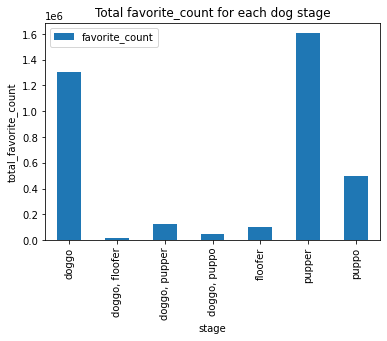

In [71]:
fav_df.groupby(['stage']).sum().plot(kind='bar',xlabel='stage',ylabel='total_favorite_count',
                                     title='Total favorite_count for each dog stage')

#### Observation2:
relationship between *retweet_count* and dog *stage*

In [72]:
retweet_df = pd.DataFrame().assign(retweet_count=twitter_archive_clean['retweet_count'],stage=twitter_archive_clean['stage'])
retweet_df.dropna()

retweet_count   stage
9            7711.0   doggo
12           8538.0   puppo
14           2321.0   puppo
29           3316.0  pupper
43           3128.0   doggo
...             ...     ...
1989          661.0  pupper
1996          137.0  pupper
2003          800.0  pupper
2009         1270.0  pupper
2011          395.0  pupper

[379 rows x 2 columns]

In [73]:
retweet_df.groupby(['stage']).sum()

retweet_count
stage                        
doggo                624181.0
doggo, floofer         3433.0
doggo, pupper         60853.0
doggo, puppo          19196.0
floofer               37403.0
pupper               702590.0
puppo                178238.0

<AxesSubplot:title={'center':'Total retweet_count for each dog stage'}, xlabel='stage', ylabel='total_retweet_count'>

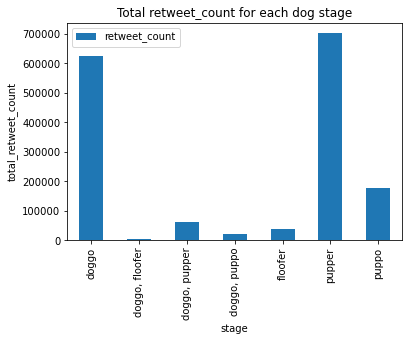

In [74]:
retweet_df.groupby(['stage']).sum().plot(kind='bar',xlabel='stage',ylabel='total_retweet_count',
                                     title='Total retweet_count for each dog stage')

**Before next set of observations**

In image_predictions dataframe, breed_pred1 has the most confidence. In this case, I would want to so some analysis on the breed of dog vs favorite counts and review_count. To do this, I would remove all records where breed_predict1 is not a breed (isBreed1 = False). Then I can easily merge tweet_data and image_prediction datasets based on tweet_id. Then we can do observe the relationships.

**Process**

- clean invalid predictions using breed_predict1
- create subset of dataframe `img_data` containing *tweet_id, breed_predict1,predict1_confidence,isBreed1*.
- create subset of twitter archive `twitter_stripped` with only tweet_id,rating,stage, favorite_count and retweet_count
- selecting rows in twitter_stipped which are in our img_data
- merge `img_data` and `twitter_stripped` into new `img_df` dataframe

In [75]:
image_predictions_clean

tweet_id                                        image_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num          breed_predict1  predict1_confidence  isBreed1  \
0           1  welsh springer spaniel             0.465074      True   
1           1                 redbone             0.506826      True   
2           1         german shepherd             0.596461      True   
3           1     rhodesian ridgeback             0.408143      True   
4           1      miniature pinscher             0.560311      True   
...       ...                     ...                  ...       ...   
2070        2                  basset             0.555712      True   
2071        1             paper towel             0.170278     False   
2072        1               chihuahua             0.716012      True   
2073        1               chihuahua             0.323581      True   
2074        1                  orange             0.097049     False   

          breed_predict2  predict2_confidence  isBreed2  \
0                 collie             0.156665      True   
1     miniature pinscher             0.074192      True   
2               malinois             0.138584      True   
3                redbone             0.360687      True   
4             rottweiler             0.243682      True   
...                  ...                  ...       ...   
2070    english springer             0.225770      True   
2071  labrador retriever             0.168086      True   
2072            malamute             0.078253      True   
2073            pekinese             0.090647      True   
2074               bagel             0.085851     False   

                   breed_predict3  predict3_confidence  isBreed3  
0               shetland sheepdog             0.061428      True  
1             rhodesian ridgeback             0.072010      True  
2                      bloodhound             0.116197      True  
3              miniature pinscher             0.222752      True  
4                        doberman             0.154629      True  
...                           ...                  ...       ...  
2070  german short-haired pointer             0.175219      True  
2071                      spatula             0.040836     False  
2072                       kelpie             0.031379      True  
2073                     papillon             0.068957      True  
2074                       banana             0.076110     False  

[2075 rows x 12 columns]

In [76]:
#cleaning invalid predictions using breed_predict1
image_predictions_clean = image_predictions_clean[image_predictions_clean.isBreed1 != False]
image_predictions_clean

tweet_id                                        image_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2068  890971913173991426  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
2069  891087950875897856  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

      img_num            breed_predict1  predict1_confidence  isBreed1  \
0           1    welsh springer spaniel             0.465074      True   
1           1                   redbone             0.506826      True   
2           1           german shepherd             0.596461      True   
3           1       rhodesian ridgeback             0.408143      True   
4           1        miniature pinscher             0.560311      True   
...       ...                       ...                  ...       ...   
2068        1               appenzeller             0.341703      True   
2069        1  chesapeake bay retriever             0.425595      True   
2070        2                    basset             0.555712      True   
2072        1                 chihuahua             0.716012      True   
2073        1                 chihuahua             0.323581      True   

          breed_predict2  predict2_confidence  isBreed2  \
0                 collie             0.156665      True   
1     miniature pinscher             0.074192      True   
2               malinois             0.138584      True   
3                redbone             0.360687      True   
4             rottweiler             0.243682      True   
...                  ...                  ...       ...   
2068       border collie             0.199287      True   
2069       irish terrier             0.116317      True   
2070    english springer             0.225770      True   
2072            malamute             0.078253      True   
2073            pekinese             0.090647      True   

                   breed_predict3  predict3_confidence  isBreed3  
0               shetland sheepdog             0.061428      True  
1             rhodesian ridgeback             0.072010      True  
2                      bloodhound             0.116197      True  
3              miniature pinscher             0.222752      True  
4                        doberman             0.154629      True  
...                           ...                  ...       ...  
2068                    ice lolly             0.193548     False  
2069              indian elephant             0.076902     False  
2070  german short-haired pointer             0.175219      True  
2072                       kelpie             0.031379      True  
2073                     papillon             0.068957      True  

[1532 rows x 12 columns]

In [77]:
#creating subset of dataframe `img_data` containing *tweet_id, breed_predict1,predict1_confidence,isBreed1*.
img_data = pd.DataFrame().assign(tweet_id=image_predictions_clean['tweet_id'],
                               breed_predict=image_predictions_clean['breed_predict1'],
                               predict_confidence=image_predictions_clean['predict1_confidence'],
                                isBreed=image_predictions_clean['isBreed1'])
img_data

tweet_id             breed_predict  predict_confidence  \
0     666020888022790149    welsh springer spaniel            0.465074   
1     666029285002620928                   redbone            0.506826   
2     666033412701032449           german shepherd            0.596461   
3     666044226329800704       rhodesian ridgeback            0.408143   
4     666049248165822465        miniature pinscher            0.560311   
...                  ...                       ...                 ...   
2068  890971913173991426               appenzeller            0.341703   
2069  891087950875897856  chesapeake bay retriever            0.425595   
2070  891327558926688256                    basset            0.555712   
2072  891815181378084864                 chihuahua            0.716012   
2073  892177421306343426                 chihuahua            0.323581   

      isBreed  
0        True  
1        True  
2        True  
3        True  
4        True  
...       ...  
2068     True  
2069     True  
2070     True  
2072     True  
2073     True  

[1532 rows x 4 columns]

In [78]:
#creating subset of twitter archive `twitter_stripped` with only tweet_id,rating,stage, favorite_count and retweet_count*.
twitter_stipped = pd.DataFrame().assign(tweet_id=twitter_archive_clean['tweet_id'],
                               rating=twitter_archive_clean['rating(/10)'],
                               stage=twitter_archive_clean['stage'],
                                retweet_count=twitter_archive_clean['retweet_count'],
                                favorite_count=twitter_archive_clean['favorite_count'])
twitter_stipped

tweet_id  rating stage  retweet_count  favorite_count
0     892420643555336193      13   NaN         8853.0         39467.0
1     892177421306343426      13   NaN         6514.0         33819.0
2     891815181378084864      12   NaN         4328.0         25461.0
3     891689557279858688      13   NaN         8964.0         42908.0
4     891327558926688256      12   NaN         9774.0         41048.0
...                  ...     ...   ...            ...             ...
2345  666049248165822465       5   NaN           41.0           111.0
2346  666044226329800704       6   NaN          147.0           311.0
2347  666033412701032449       9   NaN           47.0           128.0
2348  666029285002620928       7   NaN           48.0           132.0
2349  666020888022790149       8   NaN          532.0          2535.0

[2350 rows x 5 columns]

In [79]:
#selecting rows in twitter_stipped which are in our img_data
img_tid = img_data.tweet_id
img_temp = twitter_stipped[twitter_stipped.tweet_id.isin(img_tid)]
img_temp.shape

(1531, 5)

In [80]:
#merging `img_data` and `twitter_stripped` into new img_df
img_df = img_data.merge(img_temp, how='inner', on='tweet_id')

In [81]:
img_df

tweet_id             breed_predict  predict_confidence  \
0     666020888022790149    welsh springer spaniel            0.465074   
1     666029285002620928                   redbone            0.506826   
2     666033412701032449           german shepherd            0.596461   
3     666044226329800704       rhodesian ridgeback            0.408143   
4     666049248165822465        miniature pinscher            0.560311   
...                  ...                       ...                 ...   
1526  890971913173991426               appenzeller            0.341703   
1527  891087950875897856  chesapeake bay retriever            0.425595   
1528  891327558926688256                    basset            0.555712   
1529  891815181378084864                 chihuahua            0.716012   
1530  892177421306343426                 chihuahua            0.323581   

      isBreed  rating stage  retweet_count  favorite_count  
0        True       8   NaN          532.0          2535.0  
1        True       7   NaN           48.0           132.0  
2        True       9   NaN           47.0           128.0  
3        True       6   NaN          147.0           311.0  
4        True       5   NaN           41.0           111.0  
...       ...     ...   ...            ...             ...  
1526     True      13   NaN         2158.0         12041.0  
1527     True      13   NaN         3261.0         20562.0  
1528     True      12   NaN         9774.0         41048.0  
1529     True      12   NaN         4328.0         25461.0  
1530     True      13   NaN         6514.0         33819.0  

[1531 rows x 8 columns]

#### Observation3:
relationship between dog *stage* and its *breed*
We now know that pupper has the larger about of records present and that it has the highest favorite_count, so we will see what possible breeds have the highest amount in pupper stage.

In [82]:
breed_stage_df = pd.DataFrame().assign(stage=img_df['stage'],
                                breed_predict=img_df['breed_predict'],
                                favorite_count=img_df['favorite_count'])
breed_stage_df.dropna()

stage     breed_predict  favorite_count
211   pupper               pug           918.0
217   pupper               pug          1515.0
222   pupper     border collie           757.0
227   pupper    great pyrenees          1411.0
229   pupper  golden retriever          1377.0
...      ...               ...             ...
1495   doggo   german shepherd         20771.0
1505  pupper    french bulldog         21524.0
1518   puppo  golden retriever         15359.0
1520   puppo          pembroke         38818.0
1523   doggo          pembroke         32467.0

[237 rows x 3 columns]

In [83]:
pupper = breed_stage_df[breed_stage_df.stage.isin(['pupper'])]
pupper

stage       breed_predict  favorite_count
211   pupper                 pug           918.0
217   pupper                 pug          1515.0
222   pupper       border collie           757.0
227   pupper      great pyrenees          1411.0
229   pupper    golden retriever          1377.0
...      ...                 ...             ...
1467  pupper          bloodhound         21125.0
1471  pupper        irish setter             0.0
1484  pupper             samoyed         50199.0
1489  pupper  labrador retriever         28903.0
1505  pupper      french bulldog         21524.0

[148 rows x 3 columns]

In [84]:
pupper.groupby(['breed_predict']).sum()

favorite_count
breed_predict                                 
american staffordshire terrier         18425.0
bernese mountain dog                    7187.0
black-and-tan coonhound                33911.0
blenheim spaniel                        5897.0
bloodhound                             24515.0
...                                        ...
tibetan mastiff                        25057.0
toy poodle                             31405.0
vizsla                                  7467.0
walker hound                            3428.0
whippet                                 1280.0

[63 rows x 1 columns]

#### Observation 4:
Keeping in mind that doggo has the second largest number of records in datasets available, we are going to look at what kinds of breeds of dogs makes up this metric and by extension, find out the possible dog breed that has the most review within the doggo stage

In [85]:
breed_stage_df2 = pd.DataFrame().assign(stage=img_df['stage'],
                                breed_predict=img_df['breed_predict'],
                                retweet_count=img_df['retweet_count'])
breed_stage_df2.dropna()

stage     breed_predict  retweet_count
211   pupper               pug          395.0
217   pupper               pug          800.0
222   pupper     border collie          137.0
227   pupper    great pyrenees          661.0
229   pupper  golden retriever          542.0
...      ...               ...            ...
1495   doggo   german shepherd         3128.0
1505  pupper    french bulldog         3316.0
1518   puppo  golden retriever         2321.0
1520   puppo          pembroke         8538.0
1523   doggo          pembroke         7711.0

[237 rows x 3 columns]

In [86]:
doggo = breed_stage_df2[breed_stage_df2.stage.isin(['doggo'])]
doggo

stage                breed_predict  retweet_count
744   doggo             golden retriever         1935.0
764   doggo             golden retriever         1979.0
780   doggo  german short-haired pointer          725.0
791   doggo               great pyrenees         1962.0
817   doggo    staffordshire bullterrier          993.0
834   doggo                   eskimo dog        52360.0
859   doggo           labrador retriever        79515.0
888   doggo                       borzoi         2564.0
920   doggo           bedlington terrier         1263.0
921   doggo              german shepherd         1846.0
941   doggo           labrador retriever         2009.0
948   doggo     chesapeake bay retriever         4376.0
962   doggo             blenheim spaniel         1104.0
1026  doggo                       beagle         3472.0
1063  doggo                       briard         6470.0
1066  doggo             golden retriever         1604.0
1081  doggo             golden retriever         4072.0
1129  doggo             golden retriever        27728.0
1136  doggo               cocker spaniel         2042.0
1154  doggo                border collie         2506.0
1211  doggo                   great dane         4207.0
1212  doggo           norwegian elkhound         3652.0
1215  doggo               cocker spaniel         2090.0
1219  doggo               siberian husky         2194.0
1247  doggo              standard poodle        42228.0
1248  doggo              standard poodle        42228.0
1258  doggo                   pomeranian         2487.0
1260  doggo                 irish setter         5053.0
1262  doggo             golden retriever         1899.0
1282  doggo           labrador retriever         1075.0
1284  doggo              german shepherd         4821.0
1286  doggo               great pyrenees        11878.0
1287  doggo             golden retriever         5757.0
1296  doggo           bedlington terrier         2554.0
1301  doggo    staffordshire bullterrier        10706.0
1302  doggo           labrador retriever         2329.0
1305  doggo             golden retriever         5757.0
1312  doggo         old english sheepdog         1744.0
1317  doggo                   pomeranian         7031.0
1318  doggo                      whippet         4746.0
1321  doggo                     pembroke         2673.0
1326  doggo                        boxer         2522.0
1367  doggo               dandie dinmont         2072.0
1372  doggo             golden retriever        13076.0
1387  doggo    staffordshire bullterrier        10706.0
1410  doggo             golden retriever         3771.0
1441  doggo                    chihuahua         3327.0
1448  doggo                     komondor         3628.0
1455  doggo           labrador retriever         5669.0
1495  doggo              german shepherd         3128.0
1523  doggo                     pembroke         7711.0

In [87]:
doggo.groupby(['breed_predict']).sum()

retweet_count
breed_predict                             
beagle                              3472.0
bedlington terrier                  3817.0
blenheim spaniel                    1104.0
border collie                       2506.0
borzoi                              2564.0
boxer                               2522.0
briard                              6470.0
chesapeake bay retriever            4376.0
chihuahua                           3327.0
cocker spaniel                      4132.0
dandie dinmont                      2072.0
eskimo dog                         52360.0
german shepherd                     9795.0
german short-haired pointer          725.0
golden retriever                   67578.0
great dane                          4207.0
great pyrenees                     13840.0
irish setter                        5053.0
komondor                            3628.0
labrador retriever                 90597.0
norwegian elkhound                  3652.0
old english sheepdog                1744.0
pembroke                           10384.0
pomeranian                          9518.0
siberian husky                      2194.0
staffordshire bullterrier          22405.0
standard poodle                    84456.0
whippet                             4746.0

#### Observation 5:
relationship between retweet_count and favorite_count

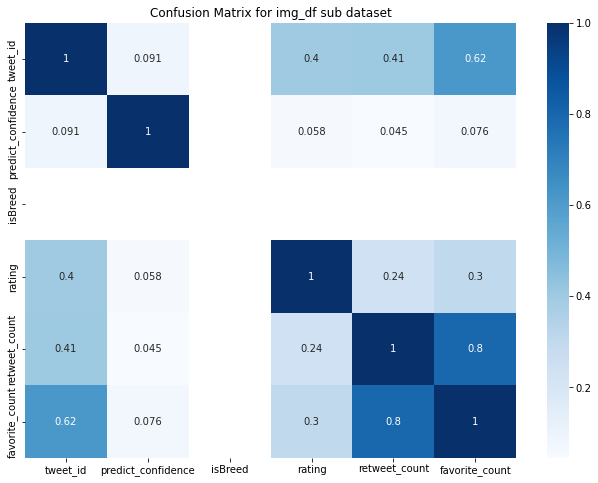

In [88]:
corr = img_df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.title('Confusion Matrix for img_df sub dataset')
plt.show()

<a id='insight'></a>
### Insights:
1. According to the data available in fav_df, dogs of the pupper stage show to be the most favorite_count. Though this analysis is strongly influenced by the higher number available data on dogs of the pupper stage in `twitter_achive_clean` dataset.

2. The retweet vs dog stage analysis shows a similar trend as that of favorite_count, having the most retweets about puppers with second highest being tweets about doggos.

3. As shown in `Breeds of dogs in Pupper stage vs Overall favorite count` visualization below, we see now that within the pupper stage, the dogs(dog tweets) that recieve the most favourite count had mostly pictures of french bulldog, golder retriever, labrador retriever, pembroke possible dog breeds, with french bulldog having the highest favourite_count.

4. As shown in `Breeds of dogs in Doggo stage vs Overall retweet count` visualization below, we see that doggos with the highest retweet counts are mostly either golden retrievers or labrador retrievers.

5. As shown by the generated confusion matrix `Confusion matrix for img_df sub dataset`, we can observe a strong relationship between the favorite_count and retweet_count attributes - 0.8. This implied that, for a given tweet with a high favorite_count we can infer that the retweet_count will be also naturally high and vice versa.
    Hence from our Observation 3 we can assume that just as french bulldog, golder retriever, labrador retriever and pembroke pupper dogs have a high overall favorite_count, we can infer that they have a high retweet_count as well.
    We can also assume that golden retrievers and labrabor retrievers having a high retweet count will also naturally have a high favorite_count.

<a id='viz'></a>
### Visualization

<AxesSubplot:title={'center':'Breeds of dogs in Pupper stage vs Overall Favorite count'}, xlabel='predicted pupper breeds', ylabel='overall favorite count'>

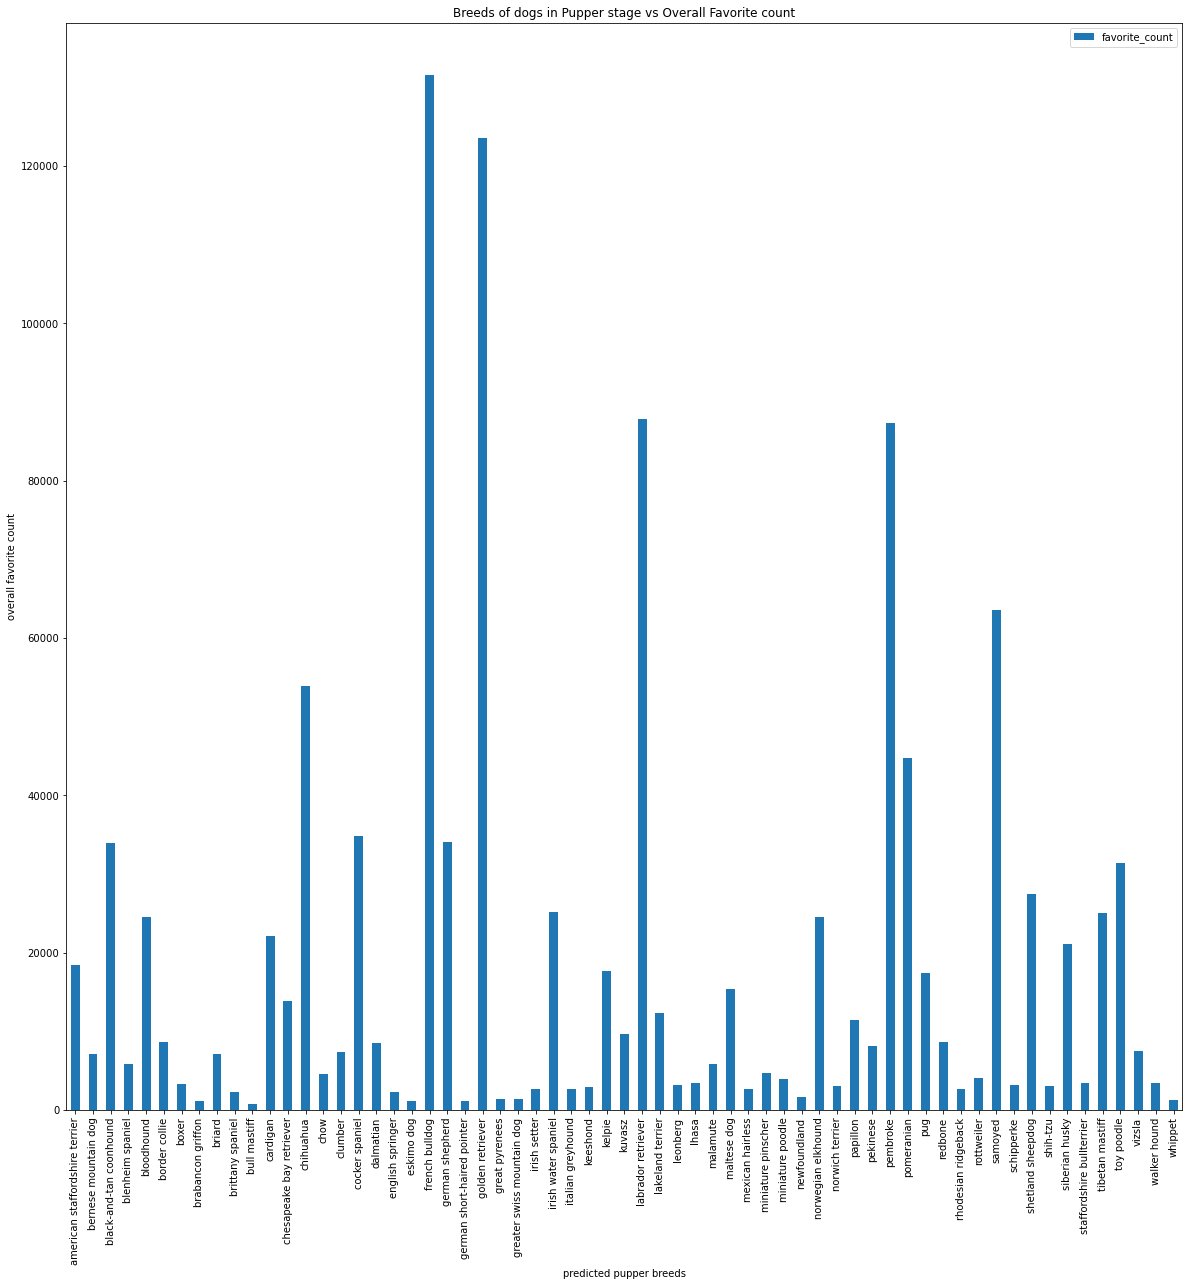

In [89]:
#pupper breeds vs favorite_count visualizaiton
pupper.groupby(['breed_predict']).sum().plot(kind='bar',title='Breeds of dogs in Pupper stage vs Overall Favorite count',
                                             xlabel='predicted pupper breeds', ylabel='overall favorite count', figsize=(20,20))

<AxesSubplot:title={'center':'Breeds of dogs in Doggo stage vs Overall Retweet count'}, xlabel='predicted doggo breeds', ylabel='overall retweet count'>

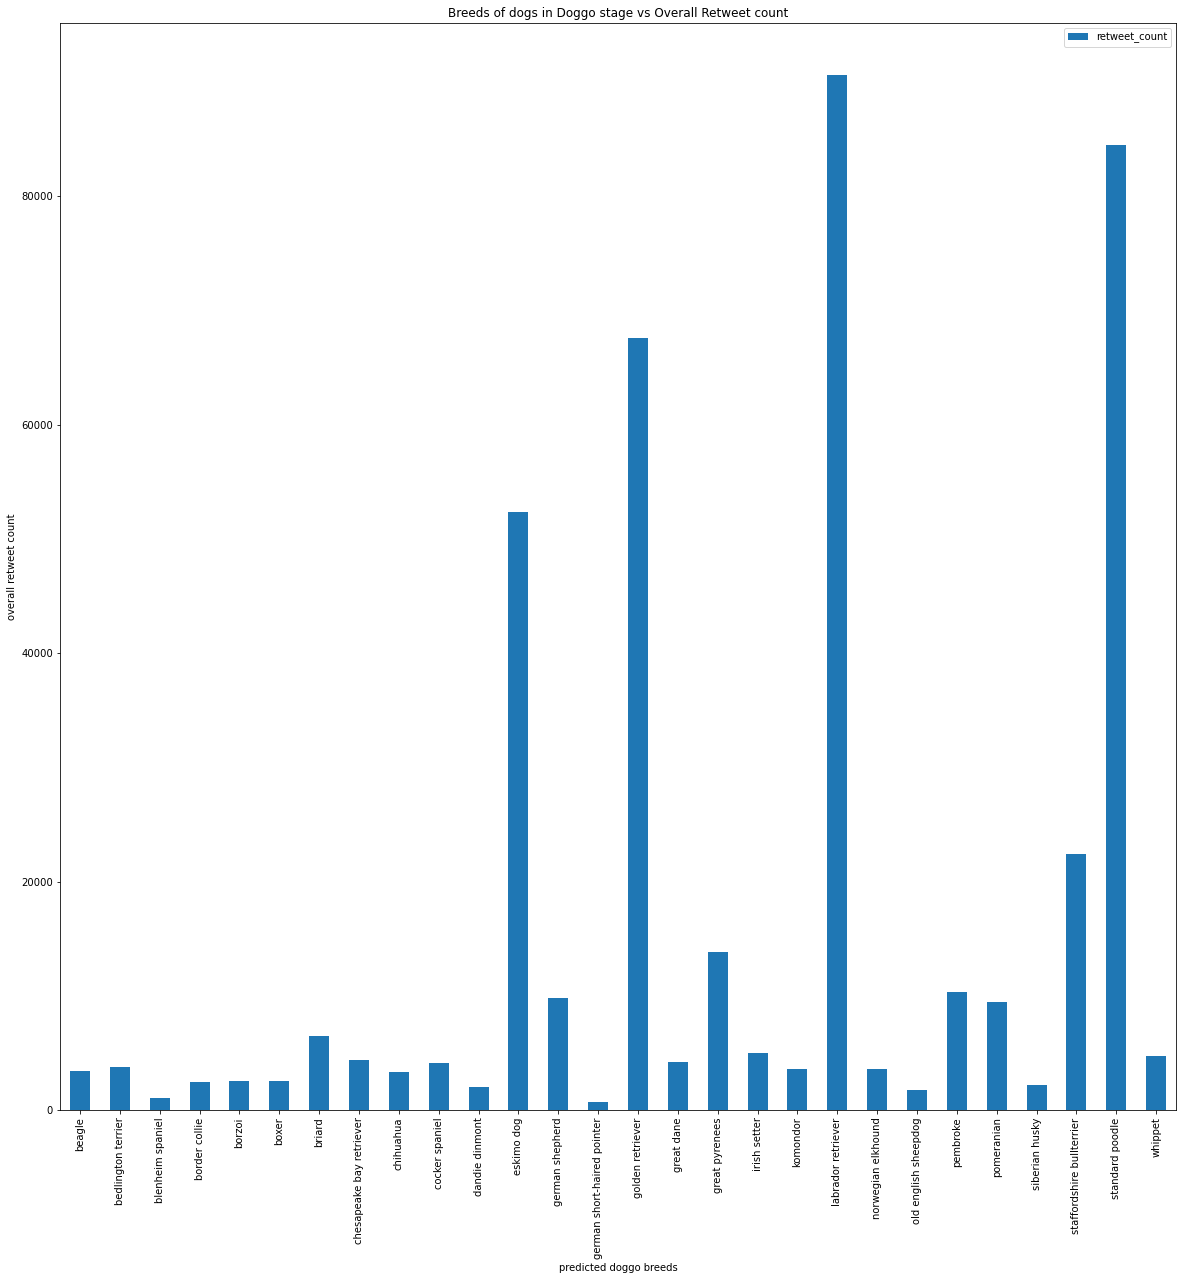

In [90]:
#doggo breeds vs retweet_count visualizaiton
doggo.groupby(['breed_predict']).sum().plot(kind='bar',title='Breeds of dogs in Doggo stage vs Overall Retweet count',
                                             xlabel='predicted doggo breeds', ylabel='overall retweet count', figsize=(20,20))

_______

🐕🐕🐕🐕💕🐕🐕🐕🐕💕🐕🐕🐕🐕💕🐕🐕🐶🐶💕🐶🐶🐶🐶💕🐶🐶🐶🐶💕🐶🐶🐕🐕💕🐕🐕🐕🐕💕🐕🐕🐕🐕💕🐕🐕🐕🐕🐕

<ul>
    <li><a href='#intro'>Back to Top</a></li>
</ul>